In [20]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Lattice,Structure,Molecule
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol import JsmolView
from pymatgen.analysis.diffraction.xrd import XRDCalculator

from jupyter_jsmol.pymatgen import quick_view

In [21]:
with MPRester("T8fAP9J6w3C63ALkqu8u") as m:
    struct = m.get_structure_by_material_id("mp-924129") #récupère les données du crystal sur MP 

symmetry = SpacegroupAnalyzer(struct) #Pour les analyses de symmétrie du crystal
structure = symmetry.get_conventional_standard_structure() #donne la maille conventionnelle
lattice = structure.lattice #Le réseau conventionnel
latticeR = lattice.reciprocal_lattice#le réseau réciproque

sym = SpacegroupAnalyzer(structure).get_symmetry_operations()

xrdc = XRDCalculator(1.54060) #initialise le XRD calculator
pattern = xrdc.get_pattern(structure) #représentation du pattern de diffraction

In [22]:
for i in range(3) : 
    print("Pic numéro {} : \n Angle associé : {} (2θ) \n Intensité du pic : {} \n Indices : {} \n".format(i+1, pattern.x[i], pattern.y[i], pattern.hkls[i][0]['hkl'],))

Pic numéro 1 : 
 Angle associé : 25.006843560219558 (2θ) 
 Intensité du pic : 16.404004096766485 
 Indices : (1, 1, 1) 

Pic numéro 2 : 
 Angle associé : 28.95387211081951 (2θ) 
 Intensité du pic : 37.29771097238528 
 Indices : (2, 0, 0) 

Pic numéro 3 : 
 Angle associé : 41.40793537432326 (2θ) 
 Intensité du pic : 100.0 
 Indices : (2, 2, 0) 



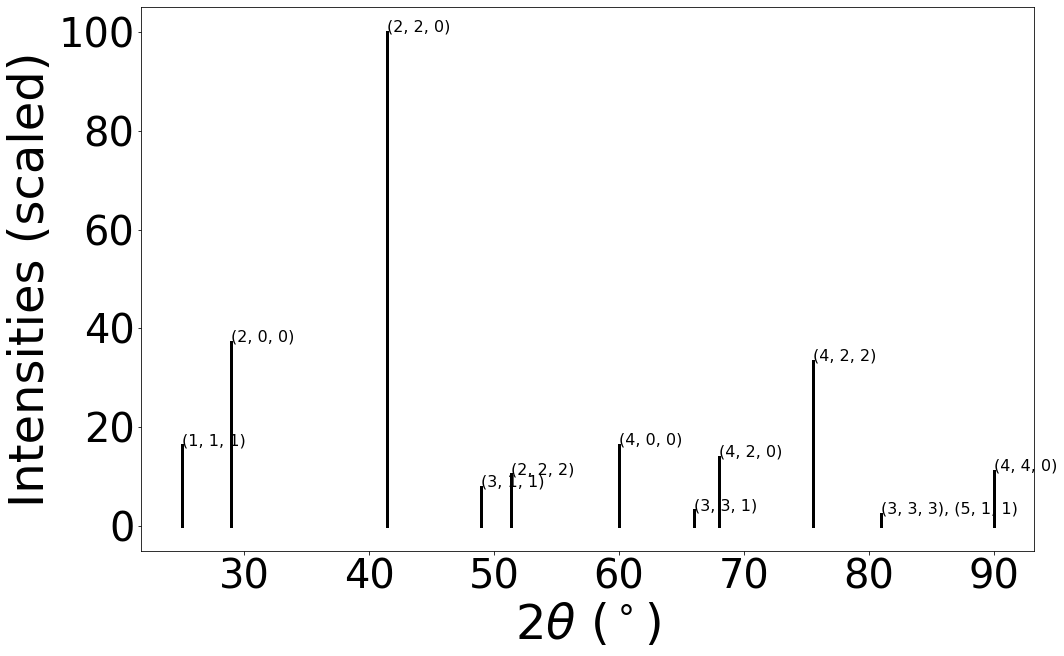

In [23]:
xrdc.show_plot(structure) # Plot le graphique des différents pics du diffractogramme